In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import seaborn as sns

- Đọc dữ liệu từ file đã tiền xử lý

In [2]:
courses_df = pd.read_csv('../Data/processed_data.csv', sep=',',engine='python', encoding='utf-8')
courses_df.columns

Index(['name', 'enrollment', 'language', 'rating', 'level', 'duration',
       'instructor', 'offered by', 'instructor_rate'],
      dtype='object')

# **MAKING QUESTIONS**

## **Question 4:**
People have a saying: “It's the first step that counts.” Beginners always have the mentality of choosing the right course by considering the number of people registering for this course and whether it is offered by a reputable University or not. **Therefore, prestigious schools have more students enrolling in their courses, don't they?**
- **_Answering this question will help_** beginners have a basis to believe whether their course selection criteria are appropriate, from which they can adjust their course selection criteria accordingly.
- **_How we answer this question:_** We will evaluate based on the correlation between the reputation of the University provided in Q1 and the total number of `enrollment` students of the University.

### **_Step 01:_** Preprocessing

In [3]:
# Reputation of each University
rating_df = courses_df[['offered by', 'rating']].groupby(by='offered by').mean().sort_values(by='rating', ascending=False)

# Compute sum enrollment of each University
enrollment_df = courses_df[['offered by', 'enrollment']].groupby(by='offered by').sum().sort_values(by='enrollment', ascending=False)

# Merge df
uni_df = pd.concat([rating_df, enrollment_df], axis=1)

In [4]:
# TEST
assert uni_df.isnull().values.any() == False
print('No NaN value.' if uni_df.isnull().values.any() == False else 'Exists NaN value.')

No NaN value.


### **_Step 02:_** Analyze

In [52]:
# Devide values into bins
intervals = [val for val in np.arange(0.0, 5.1, 0.5)]
uni_df['rating_bin'] = pd.cut(uni_df['rating'], intervals)
uni_plot = uni_df.reset_index().drop(columns=['rating', 'offered by']).groupby(by='rating_bin').sum()
uni_plot.index = uni_plot.index.astype(str)

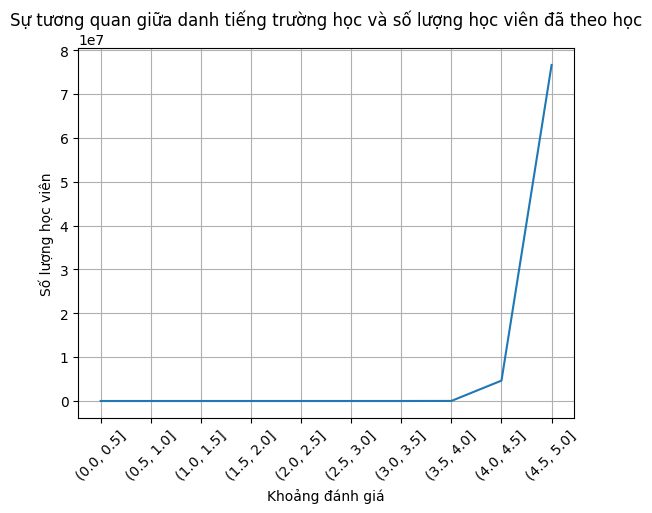

In [54]:
# Plot line chart
# Tạo biểu đồ
plt.plot(uni_plot.index.values, uni_plot['enrollment'])

# Thêm tên biểu đồ
plt.title("Sự tương quan giữa danh tiếng trường học và số lượng học viên đã theo học")

# Thêm tên và giá trị trục Õ
plt.xlabel("Khoảng đánh giá")
plt.xticks(uni_plot.index.values, rotation=45)

# Thêm tên và giá trị trục Oy
plt.ylabel("Số lượng học viên")

# Hiển thị biểu đồ
plt.grid()
plt.show()